In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Initialization of fixed parameters

year = (2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022)
numbers = (12.41, 21.96, 13.71, 12.22, 12.10, 8.19, 5.02, 7.03, 4.03, 5.33, 3.08, 0.00, 8.07)


a1 = (0.22, 0.21, 0.133, 0.11, 0.11, 0.07, 0.081, 0.117, 0.094, 0.11, 0.12, 0.19, 0.204)


a2 = (0.4, 0.42, 0.533, 0.63, 0.55, 0.625, 0.519, 0.7, 0.64, 0.58, 0.4, 0.31, 0.4)

#pop_changing = (151423,156905,162585,168471,174570,180889,187437,194222,201020,208277,215692,223241,230809)

#population= 194222
n_iter = 100000

incidence = []
lower_ci = []
upper_ci = []


#Define alpha and beta values
def getAlphaBeta(mu, sigma):
    alpha=(((1-mu)/sigma**2)-(1/mu))*mu**2
    beta=((1/mu)-1)*alpha

    return alpha, beta



Calculating population

In [3]:
#before 2017
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
year1= year[0:7]
val_17 = 194222 # population in 2017
percentage=1.0362 # population growth rate for each year (2014-2016)
temp2 = val_17
pop_changing=[]

for i in year1:
  temp2 = temp2/percentage
  temp2 = math.ceil(temp2)
  pop_changing.append(temp2)
pop_changing.reverse()

In [4]:
#after 2017
year2=year[8:13]
per=(3.62, 3.61, 3.56, 3.50, 3.39) # population growth rate for each year (2018-2021)
temp = val_17
for i in year2:
  temp = temp + (temp*per[i-2018]/100)
  temp = math.ceil(temp)
  pop_changing.append(temp)
pop_changing.insert(7, val_17) #inserting population for 2017
pop_changing

[151426,
 156907,
 162587,
 168472,
 174570,
 180889,
 187437,
 194222,
 201253,
 208519,
 215943,
 223502,
 231079]

In [5]:
#Calculate adjusted incidence for each year

for x in year:
  # Define the distribution of cases
  true_incidence = numbers[x-2010]/pop_changing[x-2010]
  cases_dist = np.random.binomial(n=pop_changing[x-2010], p=true_incidence, size=n_iter)

  # Define the distributions of the adjustment factors
  (alpha1,beta1) = getAlphaBeta(a1[x-2010],0.01)
  (alpha2,beta2) = getAlphaBeta(a2[x-2010],0.01)
  (alpha3,beta3) = getAlphaBeta(0.99,0.01)
  a1_dist = np.random.beta(alpha1, beta1, size=n_iter)
  a2_dist = np.random.beta(alpha2, beta2, size=n_iter)
  a3_dist = np.random.beta(alpha3, beta3, size=n_iter)

  # Calculate the crude incidence rate
  crude_rate_dist = cases_dist / pop_changing[x-2010]

  # Calculate the adjusted incidence rate
  adjusted_rate_dist = crude_rate_dist / (a1_dist * a2_dist * a3_dist)
  incidence.append(np.mean(adjusted_rate_dist*100000))

  # Calculate the uncertainty intervals (e.g. 95% confidence intervals) for the adjusted incidence rate
  lower_ci.append(np.percentile(adjusted_rate_dist*100000,2.5))
  upper_ci.append(np.percentile(adjusted_rate_dist*100000,97.5))


Text(0.5, 1.0, 'Pneumococcal incidence ALL IPD')

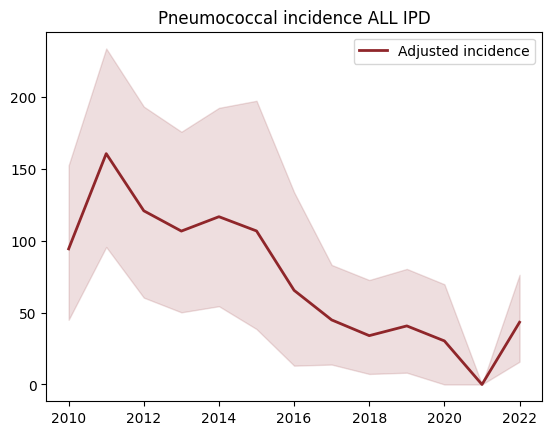

In [6]:
#Plotting the values

plt.plot(year, incidence, '#8F262A', linewidth=2, markersize=12)
#plt.plot(year, lower_ci,'#B298CB', linewidth=2, markersize=12)
#plt.plot(year, upper_ci,'#98CB98', linewidth=2, markersize=12)
plt.fill_between(year, lower_ci, upper_ci, color='#8F262A', alpha=.15)
plt.legend(['Adjusted incidence'])
plt.title("Pneumococcal incidence ALL IPD")

In [7]:
df = pd.DataFrame(
    {'year': year,"incidence":incidence,
     'upper_ci': upper_ci,
     'lower_ci': lower_ci
    })

In [8]:
df

,year,incidence,upper_ci,lower_ci
0,2010,94.372180,152.490820,45.006769
1,2011,160.638971,233.825554,95.679617
2,2012,120.867299,193.375866,60.421216
3,2013,106.747869,175.850282,50.204127
4,2014,116.753519,192.497900,54.457602
5,2015,106.841130,197.419386,38.563485
6,2016,65.515957,133.755691,13.088951
7,2017,44.923644,83.178154,13.856270
8,2018,33.983600,72.696803,7.317460
9,2019,40.758463,80.413981,8.195060


Downloading the dataset

In [9]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
te=pd.DataFrame(df)
te.to_excel("Pneumococcal incidence ALL IPD.xlsx")